# **TUGAS BESAR PEMBELAJARAN MESIN - CLUSTERING**


---


Mochammad Iqbal         
1301194472          
IF-43-12

**Tugas :**

a.  Formulasi Masalah: jelaskan apa permasalahan yang akan diselesaikan.

b. Eksplorasi dan Persiapan Data (termasuk data splitting): lakukan semua teknik
eksplorasi dan persiapan data yang menurut Anda perlu dilakukan. Jelaskan
mengapa perlu melakukan teknik tersebut, dan lakukan analisis terhadap
hasilnya.

c. Pemodelan: bangunlah model menggunakan data hasil praproses 2.b, dan lakukan
proses training untuk mendapatkan hasil terbaik. Jelaskan secara detail semua
proses yang Anda lakukan dilengkapi dengan justifikasi dan analisis hasilnya.

d. Evaluasi: pilih metode evaluasi yang sesuai beserta justifikasinya. Lakukan evaluasi
terhadap model yang telah dihasilkan. Berikan analisis terhadap hasil evaluasi.

e. Eksperimen: lakukan berbagai eksperimen yang melibatkan tahapan Eksplorasi
dan Persiapan Data, Pemodelan, dan Evaluasi untuk mendapatkan hasil terbaik. 
Laporkan semua Eksperimen yang Anda lakukan beserta analisis hasil dan
perbandingannya.

f. Kesimpulan: berikan kesimpulan dari semua proses yang dijalankan beserta hasil
akhir dari berbagai eksperimen yang telah dilakukan

***import Library***

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
import random
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler


In [14]:
#inisialisasi data dan menjadikan 1
datates1 = pd.read_csv("https://raw.githubusercontent.com/mochbale/Clustering/main/kendaraan_test.csv")
datates2 = pd.read_csv("https://raw.githubusercontent.com/mochbale/Clustering/main/kendaraan_train.csv")
dataframe = datates1.append(datates2)
dataframe.head(12)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0,NaN
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0,NaN
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0,NaN
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0,NaN
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0,NaN
5,Pria,26.0,1.0,28.0,1.0,< 1 Tahun,Tidak,42721.0,152.0,198.0,0,NaN
6,Wanita,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,65801.0,152.0,160.0,0,NaN
7,Wanita,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,30981.0,26.0,79.0,0,NaN
8,Pria,23.0,1.0,15.0,1.0,< 1 Tahun,Tidak,32365.0,152.0,219.0,0,NaN
9,Wanita,43.0,1.0,28.0,0.0,1-2 Tahun,Pernah,65380.0,25.0,41.0,1,NaN


# **Eksplorasi dan Persiapan Data**

Langkah yang harus dilakukan sebelum momodelisasi ialah membersihkan data yang kosong dan lain lainnya. seperti ada tidak pencilan data ada juga yang kosong itu harus dibersihkan terlebih dahulu.

**Mengecek Isi dari Data frame yang Nan**

In [15]:
#melakukan pengecekan terhadapa missig value
dataframe = dataframe.drop(axis=1, columns=["Kendaraan_Rusak", "SIM", "Sudah_Asuransi", "Jenis_Kelamin", "Umur_Kendaraan", "Tertarik", "id"])
dataframe.sample(10)
dataframe.isnull().sum()

Umur                 14214
Kode_Daerah          14306
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

**Menghandling Missing Value**

In [16]:
dataframe['Umur'] = dataframe['Umur'].replace(np.NaN, dataframe['Umur'].mean())
dataframe['Kode_Daerah'] = dataframe['Kode_Daerah'].replace(np.NaN, dataframe['Kode_Daerah'].mode()[0])
dataframe['Premi'] = dataframe['Premi'].replace(np.NaN, dataframe['Premi'].mean())
dataframe['Kanal_Penjualan'] = dataframe['Kanal_Penjualan'].replace(np.NaN, dataframe['Kanal_Penjualan'].mode()[0])
dataframe['Lama_Berlangganan'] = dataframe['Lama_Berlangganan'].replace(np.NaN, dataframe['Lama_Berlangganan'].mean())
#dicek lagi untuk misiing value apakah masih ada
dataframe.isnull().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

**Pengecekan Data Pencilan**

Text(0.5, 1.0, 'Premi')

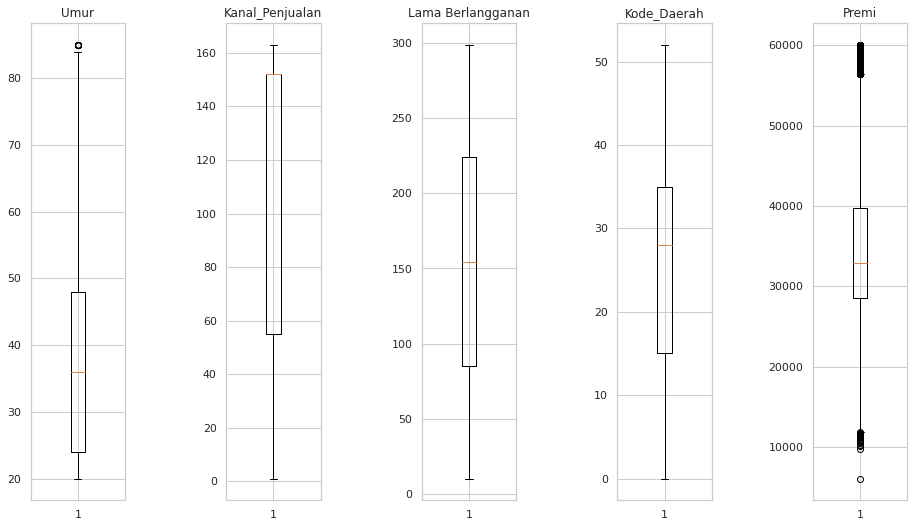

In [ ]:
# Membuat boxplot agar mengetahui apakah ada data outlier
fig, (  Umur, Kanal_Penjualan, Lama_Berlangganan, Kode_Daerah, Premi) = plt.subplots(1,5)
fig.tight_layout()
fig.set_size_inches(14,8)
Umur.boxplot(dataframe["Umur"])
Umur.set_title("Umur")
Kanal_Penjualan.boxplot(dataframe["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")
Lama_Berlangganan.boxplot(dataframe["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")
Kode_Daerah.boxplot(dataframe["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")
Premi.boxplot(dataframe["Premi"])
Premi.set_title("Premi")

**Hapus Pencilan Data**

Menghapus pencilan data menggunakan metoda IQR yang menggambarkan untuk nilai yang memiliki 50% yang dengan membanding quartal 3 dengan quartal 1 

Text(0.5, 1.0, 'Premi')

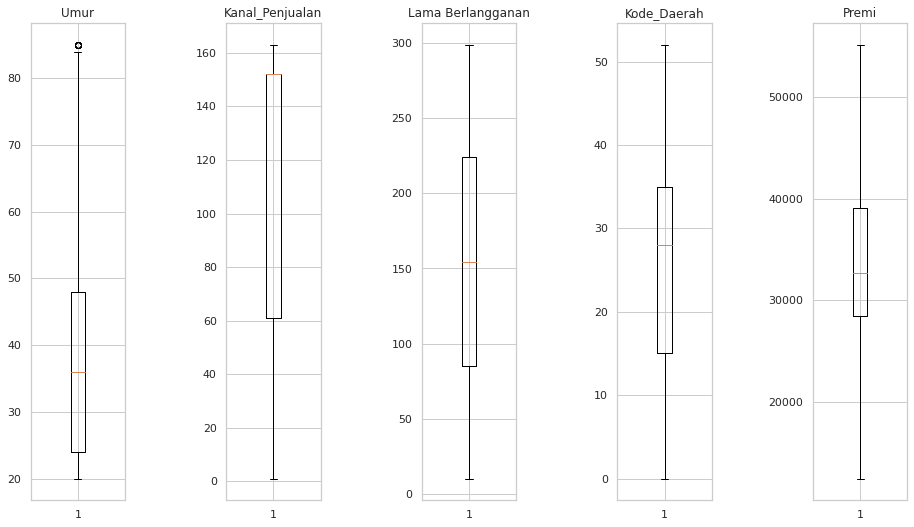

In [ ]:
# Delete with IQR Method

# Menghitung Mean dan juga persentil 
data_describe = dataframe.describe()

Untuk_Premi_75 = data_describe["Premi"].loc["75%"]
Untuk_Premi_25 = data_describe["Premi"].loc["25%"]

IQR = float(Untuk_Premi_75 - Untuk_Premi_25)
Q1 = float(Untuk_Premi_25 - (IQR * 1.5))
Q2 = float(Untuk_Premi_75 + (IQR * 1.5))

dataframe = dataframe[(dataframe["Premi"] > Q1) & (dataframe["Premi"] < Q2)]

fig, (  Umur, Kanal_Penjualan, Lama_Berlangganan, Kode_Daerah, Premi) = plt.subplots(1,5)
fig.tight_layout()
fig.set_size_inches(14,8)
Umur.boxplot(dataframe["Umur"])
Umur.set_title("Umur")
Kanal_Penjualan.boxplot(dataframe["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")
Lama_Berlangganan.boxplot(dataframe["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")
Kode_Daerah.boxplot(dataframe["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")
Premi.boxplot(dataframe["Premi"])
Premi.set_title("Premi")

**Penormalisasian Data Frame**

Pengurangan redudansi terhadap data san juga untuk memastikan dependensi datanya.

In [ ]:
dataframe =(dataframe - dataframe.mean() )/ dataframe.std()
dataframe.head(5)

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.722295,-1.448836,1.620977,-1.668580,-0.112900
1,-1.064181,1.594990,0.702021,0.708305,1.058855
3,0.523798,-1.448836,0.281547,0.180109,-1.467742
4,-0.204026,-0.278133,-0.883331,0.708305,0.912385
5,-0.799518,0.112101,1.089813,0.708305,0.534006


**Distribusi Data Frane dan Visualisasi Data Frame**

Kemudian menentukan arah dari korelasi  dan membuat visualisasinya.

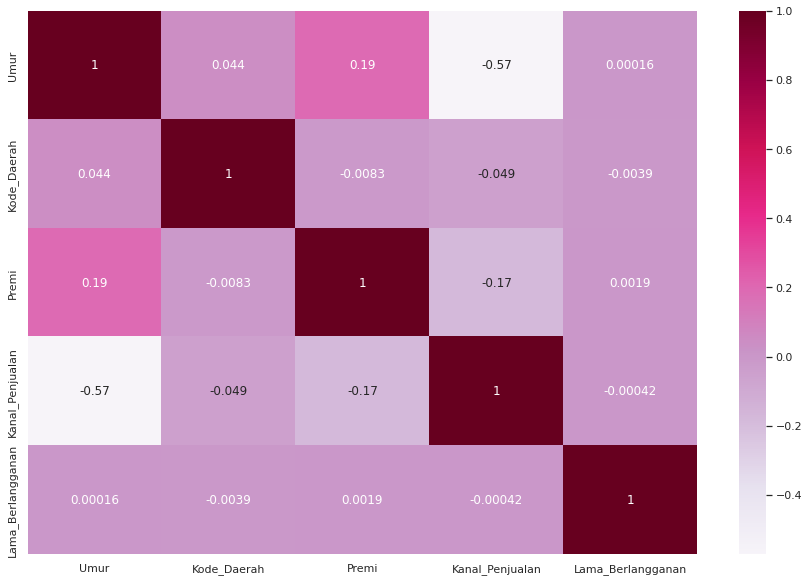

In [ ]:
# pembuatan heatmap ini bisa melihat korelasi antara fitur fitur yang ada.
dataframe_korelasi = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dataframe_korelasi, annot=True, ax=ax, cmap='PuRd')

**Kesimpulan**

Pada hasil yang diatas mulai sudah bisa dilakukan visualisasi data maka hasil dari prosesnya dapat disimpulkan bahwa dari heatmap fitur terbaik korelasinya yaitu untuk umur dan kanal penjualan.

K-mean Algoritma ialah untuk melakukan sebuah proses modeling unsupervised learning dengan metoda yang dilakukan dengan cara pengelompokan data

**Penerapan Algoritma K-means**

In [36]:
# Menghitung Global jarak menggunakan euclidean
def jarak_euclidean(j1, j2):
    return np.sqrt(np.sum((j1 - j2) ** 2))
# Class K_means
class K_Means:

  #Membuat object dan constructor
    def __init__(self, K, max_loop = 100):
        self.K = K
        self.max_loop = max_loop
        #cluster akan menginisialisasi sepanjang K
        self.clusters =[[] for i in range(self.K)]
        #Centroid untuk cluster
        self.centorids = []

    #Perhitungan jarak antara centroid lama dan centroid baru
    def _isConvergen(self, centroidsOld , centroidsNew):
        #Perhitungan jarak dengan cara euclidean
        jarak = [jarak_euclidean(centroidsOld[i], centroidsNew[i]) for i in range(self.K)]
        return sum(jarak) == 0
        
    def fit(self, Y):
        #melakukan pengecekan terhadap suatu objek bukan instance dari suatu kelas
        if not isinstance(Y, np.ndarray):
            Y = np.array(Y)
        #pengecekan fitur dataframe
        if Y.size == 0:
            raise ValueError("Fitur harus > 0")
        # Memeriksa array berdimensi 1
        if Y.ndim == 1:
            self.n_samples, self.n_features = 1, Y.shape
        else:
            self.n_samples, self.n_features = Y.shape[0], np.prod(Y.shape[1:])
            
        self.Y = Y

        #agar centroid tidak sama maka dilakuakn
        #akan melakuakn random sebanyak n sampel
        random_centroid = np.random.choice(self.n_samples, self.K, replace=False)

        # Proses inisialisasi centroid 
        self.centroids = [self.Y[i] for i in random_centroid]
        # Optimisasi
        for i in range(self.max_loop):      
          # Update cluster
          self.clusters = self._getCluster(self.centroids)
          # Update centroid dapat menyimpan nilai centroid agar bisa di cek apakah convergen
          centroids_old = self.centroids
          self.centroids = self._getCentroid(self.clusters)

          # Cek apakah converge, jika 0 maka break
          if self._isConvergen(centroids_old, self.centroids):
            break
        
        return self.getClusterLabel()

    def _getCluster(self, centroids):

        # Membuat list kosong untuk cluster
        clusters = [[] for i in range(self.K)]

        # Enumerate mengembalikan nilai i dan sample ke-i
        for i, sample in enumerate(self.Y):

            # Mendapatkan centroid terdekat
            centroid_i = self._centroidTerdekat(sample, centroids)

            # Menambahkan pada array cluster centroid_i, i dan sample saat ini
            clusters[centroid_i].append(i)
        return clusters
    
    def _centroidTerdekat(self, sample, centroids):
        # Menghitung jarak sample data dengan setiap centroid yang ada
        jarak = [jarak_euclidean(sample, point) for point in centroids]

        # Setelah menghitung jarak antara sample data dengan setiap centroid,
        # Selanjutnya menentukan mana jarak paling minimum
        terdekat = np.argmin(jarak)
        return terdekat

    # Nilai rata-rata cluster ke centroid, jadi untuk setiap cluster menghitung rata-ratanya
    def _getCentroid(self,clusters):
        # Inisialisasi nol
        centroids = np.zeros((self.K, self.n_features))
        # Iterasi dilakukan sebanyak clusters
        for iCluster, cluster in enumerate(clusters):
          # Menghitung mean cluster
          ratarata_cluster = np.mean(self.Y[cluster], axis=0)
          centroids[iCluster] = ratarata_cluster
        return centroids

    # Untuk sampling data mendapatkan label cluster
    def getClusterLabel(self):
        labels = np.empty(self.n_samples)
        #perulanagan terhadap clusternya
        for i, cluster in enumerate(self.clusters):
          for j in cluster:
            labels[j] = i
        return labels

    #visualisasi cluster
    def plot(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i, index in enumerate(self.clusters):
            point = self.Y[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="blue", linewidth=2)
        plt.show()

**Visulisasi Hasil K-Means**

hasil yang didapat dari dengan menggunakan scatterplot

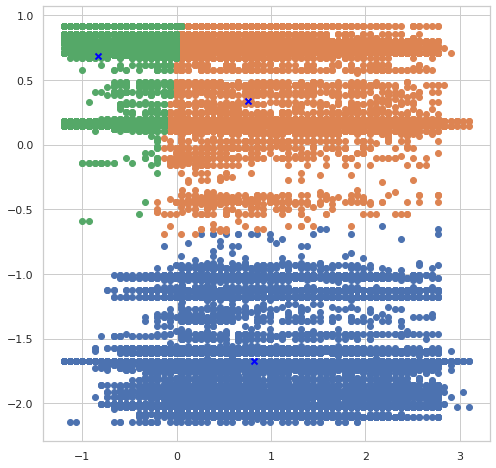

In [ ]:
#pengalpikasian algoritma k-mean
dataframe_selected = dataframe[['Umur','Kanal_Penjualan']]
kmean = K_Means(K=3)
fit = kmean.fit(dataframe_selected)
kmean.plot()

**Evaluasi**

,odel elbow menggunakan elbow method dengan metoda yang sering terpakai untuk menentukan banyaknya cluster pada kmean cluster.

**Algoritma Elbow Method**

In [ ]:
# Algoritma Elbow
dataframe_selected = dataframe[['Umur','Kanal_Penjualan']]
distortions = []
wcss=[]
K = range(1, 15)
for i in K:
    model = KMeans(i)
    model.fit(dataframe_selected)
    wcss_iters = model.inertia_
    wcss.append(wcss_iters)

**Visualisasi Elbow Method**

WCSS adalah jumlah kuadrat jarak antara setiap titik dan centroid dalam sebuah cluster . Ketika kita memplot WCSS dengan nilai K, plotnya terlihat seperti Elbow. Dengan bertambahnya jumlah cluster, nilai WCSS akan mulai berkurang. Nilai WCSS terbesar ketika K = 1.

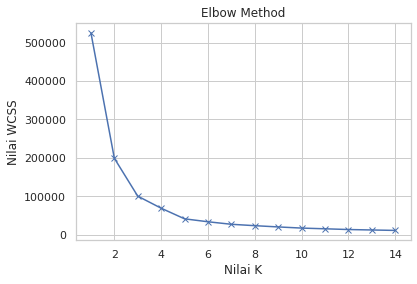

In [ ]:
# Menggunakan matplotlib untuk membuat scatter plot
plt.plot(K, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Nilai K')
plt.ylabel('Nilai WCSS')
plt.show()

***Kesimpulan***

karena cluster yang optimal dengan data yang diberikan itu maka diliat dari grafiknya nilai k nya itu 3, garis penurunannya semakin mendekati linear.

## ***Hanya Test***

In [38]:
# Menghitung Global jarak menggunakan euclidean
def jarak_euclidean(j1, j2):
    return np.sqrt(np.sum((j1 - j2) ** 2))
# Class K_means
class K_Means:

  #Membuat object dan constructor
    def __init__(self, K, max_loop = 100):
        self.K = K
        self.max_loop = max_loop
        #cluster akan menginisialisasi sepanjang K
        self.clusters =[[] for i in range(self.K)]
        #Centroid untuk cluster
        self.centorids = []

    #Perhitungan jarak antara centroid lama dan centroid baru
    def _isConvergen(self, centroidsOld , centroidsNew):
        #Perhitungan jarak dengan cara euclidean
        jarak = [jarak_euclidean(centroidsOld[i], centroidsNew[i]) for i in range(self.K)]
        return sum(jarak) == 0

    def fit(self, Y):
        #melakukan pengecekan terhadap suatu objek bukan instance dari suatu kelas
        if not isinstance(Y, np.ndarray):
            Y = np.array(Y)
        #pengecekan fitur dataframe
        if Y.size == 0:
            raise ValueError("Fitur harus > 0")
        # Memeriksa array berdimensi 1
        if Y.ndim == 1:
            self.n_samples, self.n_features = 1, Y.shape
        else:
            self.n_samples, self.n_features = Y.shape[0], np.prod(Y.shape[1:])
            
        self.Y = Y

        #agar centroid tidak sama maka dilakuakn
        #akan melakuakn random sebanyak n sampel
        random_centroid = np.random.choice(self.n_samples, self.K, replace=False)

        # Proses inisialisasi centroid 
        self.centroids = [self.Y[i] for i in random_centroid]
        # Optimisasi
        for i in range(self.max_loop):      
          # Update cluster
          self.clusters = self._getCluster(self.centroids)
          # Update centroid dapat menyimpan nilai centroid agar bisa di cek apakah convergen
          centroids_old = self.centroids
          self.centroids = self._getCentroid(self.clusters)

          # Cek apakah converge, jika 0 maka break
          if self._isConvergen(centroids_old, self.centroids):
            break
        
        return self.getClusterLabel()

    def _getCluster(self, centroids):

        # Membuat list kosong untuk cluster
        clusters = [[] for i in range(self.K)]

        # Enumerate mengembalikan nilai i dan sample ke-i
        for i, sample in enumerate(self.Y):

            # Mendapatkan centroid terdekat
            centroid_i = self._centroidTerdekat(sample, centroids)

            # Menambahkan pada array cluster centroid_i, i dan sample saat ini
            clusters[centroid_i].append(i)
        return clusters
    
    def _centroidTerdekat(self, sample, centroids):
        # Menghitung jarak sample data dengan setiap centroid yang ada
        jarak = [jarak_euclidean(sample, point) for point in centroids]

        # Setelah menghitung jarak antara sample data dengan setiap centroid,
        # Selanjutnya menentukan mana jarak paling minimum
        terdekat = np.argmin(jarak)
        return terdekat

    # Nilai rata-rata cluster ke centroid, jadi untuk setiap cluster menghitung rata-ratanya
    def _getCentroid(self,clusters):
        # Inisialisasi nol
        centroids = np.zeros((self.K, self.n_features))
        # Iterasi dilakukan sebanyak clusters
        for iCluster, cluster in enumerate(clusters):
          # Menghitung mean cluster
          ratarata_cluster = np.mean(self.Y[cluster], axis=0)
          centroids[iCluster] = ratarata_cluster
        return centroids


    # Untuk sampling data mendapatkan label cluster
    def getClusterLabel(self):
        labels = np.empty(self.n_samples)
        #perulanagan terhadap clusternya
        for i, cluster in enumerate(self.clusters):
          for j in cluster:
            labels[j] = i
        return labels

    #visualisasi cluster
    def plot(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i, index in enumerate(self.clusters):
            point = self.Y[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="blue", linewidth=3)
        plt.show()

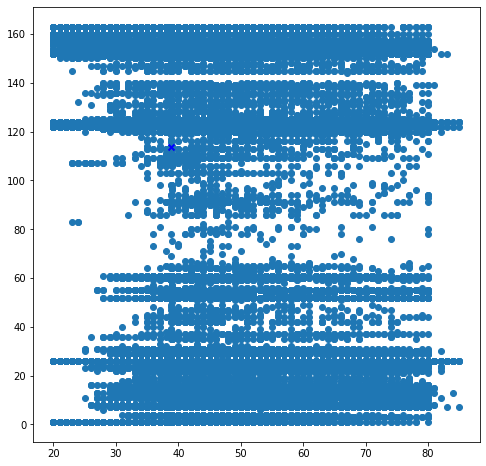

In [37]:
#pengalpikasian algoritma k-mean
dataframe_selected = dataframe[['Umur','Kanal_Penjualan']]
kmean = K_Means(K=1)
fit = kmean.fit(dataframe_selected)
kmean.plot()